# Project: Investigate a Dataset - TMDb_movie_data

#### Name of Analyst: Emenike Goodluck

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from [The Movie Database (TMDb)](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&source=editors&ust=1659199553054950&usg=AOvVaw2qgwFfVzA8RdT9nztRA_B6), including user ratings and revenue. 

### Description of the columns
* id : Unique identifier of a movie in the dataset
* imdb_id : IMDb's unique identifiers for each of the entities
* popularity: IMDb's measure of popularity of a movie based on the page views related to a movie.
* budget: Approximate production cost of the movie
* revenue: money generated from the movie
* original_title: The title of the movie
* cast : Major people who acted the movie
* homepage: Link to the movie website homepage
* director: the creative lead of the movie
* tagline: a short description of the movie
* keywords: a word or group of words related to the movie
* overview: a brief summary of a completed screenplay's core concept, major plot points, and main character arcs
* runtime: the length of the film plus the length of the ending credits
* genres: a category based on the narrative elements relating to the main driving force behind the story
* production_companies: Company that produced the movie
* release_date: this is when a completed movie is released for the public to see
* vote_count: a vote on every released movie title in the IMDb database by registered users
* vote_average: the mean vote for a movie
* release_year: this is the year when a completed movie is released for the public to see
* budget_adj: budget adjusted for inflation
* revenue_adj: revenue adjusted for inflation

### Question(s) for Analysis

<ul>
<li><a href="#q1">Which genres are most popular from year to year?</a></li>
<li><a href="#q2">What kinds of properties are associated with movies that have high revenues?</a></li>
<li><a href="#q3">Does the popularity of a movie affect its revenue?</a></li>
<li><a href="#q4">How does the budget affect the movie runtime?</a></li>
<li><a href="#q4">Which year had the highest movie releases?</a></li>
</ul>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

In [3]:
# Function that plots a bar graph for a given dataset
def plotBar (df, x_axis_title, y_axis_title):
    df.plot.bar(figsize = (10,10));
    plot_title = "Bar graph showing  "+ str(y_axis_title) + " against " + str(x_axis_title)
    plt.xlabel(x_axis_title);
    plt.ylabel(y_axis_title);
    plt.title(plot_title);
    

<a id='wrangling'></a>
## Data Wrangling

> Let us load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


In [4]:
# Let us load the data.
dirty_df = pd.read_csv("tmdb-movies.csv")
# Let us check few lines of the data that we have uploaded
dirty_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check the shape of the data
print("Shape of data: ", dirty_df.shape,"\n")

# Check the datatypes, columns and missing values
dirty_df.info()

Shape of data:  (10866, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null i

In [6]:
# Summary of the data
dirty_df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [7]:
# Number of duplicated data
print("Number of duplicated data: ",sum(dirty_df.duplicated()))

# How much data is missing from each column?
dirty_df.isnull().sum()

Number of duplicated data:  1


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
 

 ### What to leave and what to discard
 
 > By examining the data, we saw that `'cast, director, homepage, tagline, genre, keywords, and production_companies'` have missing data. We can drop the `homepage` column immediately as it does not have an impact on the questions that we are trying to answer. Also, over 50% of its data are missing. After this, we can drop the columns that may not be important to our analysis as well as the rows that have missing data.
 
 > We will drop the following columns `"imdb_id,id,homepage,tagline,keywords, budget_adj and revenue_adj"`. We are dropping the adjusted revenue and adjusted budget columns because they are equivalent to the revenue and budget columns respectively. The only difference between the adjusted values and the actual values is the multiplication by a constant which will not affect the relationships in the data 

In [8]:
# Remove duplicate data
dirty_df.drop_duplicates(inplace=True)

# Check for duplicates again
sum(dirty_df.duplicated())

0

> By running `dirty_df.drop_duplicates()`, I removed the duplicated data and stored the changes using the argument `inplace=True`. After removing the duplicates, I had to check if the duplicated data were actually dropped by running `sum(dirty_df.duplicated())`

> Now, let us drop the unnessesary columns.

In [9]:
# Drop the unnecessary columns
dirty_df.drop(['imdb_id','id','homepage','tagline', 'keywords','overview','revenue_adj','budget_adj'], axis = 1, inplace = True)

# Check if the column was really dropped and check the amount of missing data in the remaining columns
dirty_df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> I dropped the unwanted columns by using the `dirty_df.drop()` function and passing the required arguments. The argument `axis = 1` means that we are operating along the columns. From the previous explanation, `inplace = True` stores updates the dataframe with the new changes.

> To check if the columns were dropped, I used `dirty_df.isnull().sum()` because this will give me the number of missing data in other columns at once. You can use `dirty_df.info()` or `dirty_df.columns` to achieve the same purpose.

> As seen from the result, production companies still have many missing data. What is going on here? is there a company that appears more frequently? Can we just drop that column? or drop all the missing values? Let us check the mode of all categorical data with missing values(That is `cast, director,genres,production_companies`).


In [10]:
dirty_df.describe(include='object')

,original_title,cast,director,genres,production_companies,release_date
count,10865,10789,10821,10842,9835,10865
unique,10571,10719,5067,2039,7445,5909
top,Hamlet,Louis C.K.,Woody Allen,Comedy,Paramount Pictures,1/1/09
freq,4,6,45,712,156,28


> As we can see, only `genres` has a mode that is greater than the missing values. We will be safer if we replace the missing values in `genres` with its mode and drop all the missing values in the rest of the columns

> Before we drop the missing values, let us fill the `genres` column with its mode

In [11]:
# Get the top genre
top_genre = dirty_df.genres.describe().top

# Print the top genre
print("The top genre is: ",top_genre)

# Fill all the missing values with the top genre
dirty_df.genres.fillna(top_genre,inplace=True)

# Check if this is updated
dirty_df.isnull().sum()

The top genre is:  Comedy


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> Now that the genre has been filled, we can go ahead and drop the rows with empty values.

In [12]:
# Drop missing data and check data again
dirty_df.dropna(inplace=True)
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9779 non-null float64
budget                  9779 non-null int64
revenue                 9779 non-null int64
original_title          9779 non-null object
cast                    9779 non-null object
director                9779 non-null object
runtime                 9779 non-null int64
genres                  9779 non-null object
production_companies    9779 non-null object
release_date            9779 non-null object
vote_count              9779 non-null int64
vote_average            9779 non-null float64
release_year            9779 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


> One last thing. We can see that the release date is not in datetime format; let us convert it.

In [13]:
# Convert the release_date to datetime format
dirty_df['release_date'] = pd.to_datetime(dirty_df['release_date'])

In [14]:
# Check the data summary again
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9779 non-null float64
budget                  9779 non-null int64
revenue                 9779 non-null int64
original_title          9779 non-null object
cast                    9779 non-null object
director                9779 non-null object
runtime                 9779 non-null int64
genres                  9779 non-null object
production_companies    9779 non-null object
release_date            9779 non-null datetime64[ns]
vote_count              9779 non-null int64
vote_average            9779 non-null float64
release_year            9779 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.0+ MB


In [15]:
# Check the data again
dirty_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


> Now that we have cleaned the data, let us save this data for future use. Then, we can proceed to answer the questions.

In [16]:
dirty_df.to_csv('clean_tmdb_movies.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, we're ready to move on to exploration. We will **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. We will compute the relevant statistics throughout the analysis when an inference is made about the data. We will create at least two or more kinds of plots as part of the exploration, and will compare and show trends in the varied visualizations. 

In [17]:
# Store the clean data as df
df = dirty_df
print(df.shape)
df.head()

(9779, 13)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='q1'></a>
### Research Question 1: Which genres are most popular from year to year?

> By this question, we are trying to find the genre which had the most number of releases. 

> First, let us seperate the genres so that each genre will have its own column.

In [18]:
# Use each genre as a column
genres_df = df.genres.str.get_dummies()
genres_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


> Now, the genres has been seperated using the `get_dummies()` function. Let us find the total number of times each genre was relesed using the `sum()` function and sort it using the `sort_values`

In [19]:
# Get the number of times each genre was released
sum_genres_df = genres_df.sum().sort_values(ascending = False)
sum_genres_df

Drama              4364
Comedy             3440
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
dtype: int64

> From the analysis above, we can see that Drama was the most popular from year to year. Let us visualize this using bar chat

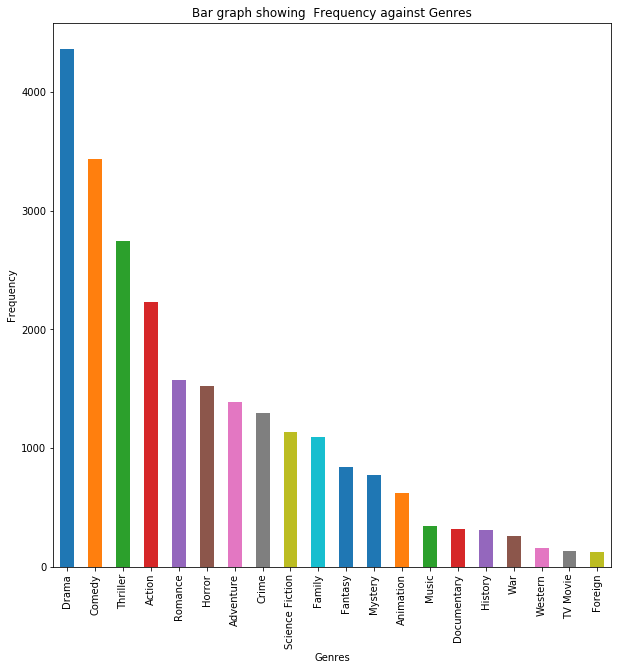

In [20]:
plotBar(sum_genres_df,"Genres","Frequency")

> From the analysis, we saw that Drama was the most popular from year to year. Why was this so? Did companies release dramas from year to year because they were the most voted?

> Let us explore the average votes for movies that are drama

In [21]:
# Create a column for all genre
all_genre_df = df.join(df.genres.str.strip('|').str.split('|',
                    expand=True).stack().reset_index(level=1,drop=True).rename('all_genres')).reset_index(drop=True)
all_genre_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,all_genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action


In [22]:
# Get the movies that are drama
drama_df = all_genre_df.query('all_genres == "Drama"')
drama_df.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,all_genres
19,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,Drama
26,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,Drama
43,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854,7.6,2015,Drama
52,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2015-12-25,2389,7.4,2015,Drama
64,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,Kenneth Branagh,112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,2015-03-12,1495,6.8,2015,Drama
74,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,123,Action|Drama,Escape Artists|Riche-Ludwig Productions,2015-06-15,1386,7.3,2015,Drama
76,4.907832,110000000,470490832,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Brad Peyton,114,Action|Drama|Thriller,New Line Cinema|Village Roadshow Pictures|Warn...,2015-05-27,2060,6.1,2015,Drama
78,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,Sam Taylor-Johnson,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,2015-02-11,1865,5.3,2015,Drama
81,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,Adam McKay,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,2015-12-11,1545,7.3,2015,Drama
88,4.062293,20000000,88346473,Spotlight,Mark Ruffalo|Michael Keaton|Rachel McAdams|Lie...,Tom McCarthy,128,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,2015-11-06,1559,7.8,2015,Drama


> Now, let us compare the average vote of all movies to the average vote of drama movies

In [23]:
# Compare the means
print("Vote average of all movies",df.vote_average.mean())
print("Vote average of drama movies",drama_df.vote_average.mean())

Vote average of all movies 5.96350342571
Vote average of drama movies 6.17839138405


> From the analysis above, we can see that drama movies receive high average votes. This may be the reason why companies release more drama movies.

<a id='q2'></a>
### Research Question 2: What kinds of properties are associated with movies that have high revenues?

> To answer this question, let us view our data again

In [24]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


> Let us find the movies with high revenues

In [25]:
# Let us see the summary of the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9779.000000,9.779000e+03,9.779000e+03,9779.000000,9779.000000,9779.000000,9779.000000
mean,0.694385,1.616809e+07,4.419955e+07,102.934349,239.153901,5.963503,2000.878311
std,1.036646,3.220211e+07,1.225507e+08,27.896541,602.824719,0.913805,13.038229
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232526,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419438,1.700000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776197,1.905000e+07,3.095669e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


In [26]:
# Find the mean revenue
mean_revenue = df['revenue'].mean()
mean_revenue

44199547.326720521

In [27]:
# Get the movies with high revenues and their properties
high_revenues = df.query('revenue >= 44199547')

#Print the shape of the different revenue data
print("Shape of the high revenue data is: ",high_revenues.shape)

# Let us get a summary of the high revenue data
high_revenues.describe(include = 'all')


Shape of the high revenue data is:  (2041, 13)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
count,2041.000000,2.041000e+03,2.041000e+03,2041,2041,2041,2041.000000,2041,2041,2041,2041.000000,2041.000000,2041.000000
unique,NaN,NaN,NaN,2019,2021,882,NaN,716,1588,1743,NaN,NaN,NaN
top,NaN,NaN,NaN,The Omen,William Shatner|Leonard Nimoy|DeForest Kelley|...,Steven Spielberg,NaN,Comedy,Paramount Pictures,2013-12-18 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,NaN,2,5,25,NaN,139,53,4,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972-03-15 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2071-12-13 00:00:00,NaN,NaN,NaN
mean,1.671759,5.407046e+07,1.927170e+08,NaN,NaN,NaN,112.949535,NaN,NaN,NaN,848.561489,6.289564,2002.097501
std,1.822736,4.920753e+07,2.090377e+08,NaN,NaN,NaN,24.203506,NaN,NaN,NaN,1081.542994,0.737958,10.483311
min,0.010335,0.000000e+00,4.433202e+07,NaN,NaN,NaN,44.000000,NaN,NaN,NaN,10.000000,3.400000,1960.000000
25%,0.760503,2.000000e+07,7.217958e+07,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,205.000000,5.800000,1997.000000


> First, let us investigate the values that occured the most in the datasets

In [28]:
high_revenues.mode()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,1.107689,0.0,50000000.0,Annie,William Shatner|Leonard Nimoy|DeForest Kelley|...,Steven Spielberg,100.0,Comedy,Paramount Pictures,2013-12-18,181.0,6.1,2011.0
1,NaN,NaN,NaN,Arthur,NaN,NaN,NaN,NaN,NaN,2014-04-16,NaN,NaN,NaN
2,NaN,NaN,NaN,Conan the Barbarian,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,NaN,NaN,NaN,Dawn of the Dead,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,NaN,NaN,NaN,Everest,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,NaN,NaN,NaN,Fantastic Four,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
6,NaN,NaN,NaN,Footloose,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
7,NaN,NaN,NaN,Friday the 13th,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
8,NaN,NaN,NaN,Godzilla,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9,NaN,NaN,NaN,Halloween,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


> We can see that many high revenue movies were produced by paramount pictures, directed by Steven Spielberg and most of the genre is comedy, mean vote average of 6.289564

<ul>
<li><a href="#q2a">How does vote average affect revenue?</a></li>
<li><a href="#q2b">Which directors directed high revenue movies?</a></li>
<li><a href="#q2c">Which cast were featured in high revenue movies?</a></li>
<li><a href="#q2d">Which genres are associated with high revenue movies?</a></li>
<li><a href="#q2e">In which month of the year was most of the high revenue movies released?</a></li>
</ul>


<a id='q2a'></a>
> Let us answer the first question
##### Q2a: How does vote average affect revenue?

In [29]:
#high_revenues.vote_average

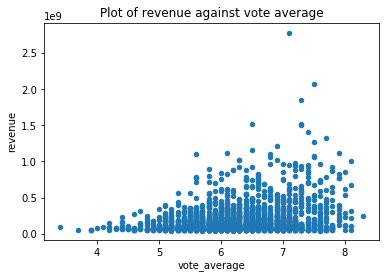

In [30]:
# Plot revenue against vote average
high_revenues.plot(kind = 'scatter', x='vote_average', y = 'revenue', title="Plot of revenue against vote average");

<a id='q2b'></a>
> As we can see, there is not strong correlation between revenue and vote average.

> Let us explore the next sub question

##### Q2b: Which directors directed high revenue movies?
> We will get the top 10 directors

In [31]:
# Get the directors
high_rev_directors_df = high_revenues.join(high_revenues.director.str.strip('|').str.split('|',
                    expand=True).stack().reset_index(level=1,drop=True).rename('all_directors')).reset_index(drop=True)
high_rev_directors_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,all_directors
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Colin Trevorrow
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,George Miller
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Robert Schwentke
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,J.J. Abrams
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,James Wan


In [32]:
# Top 10 directors of high revenue movies
high_rev_directors_df.all_directors.value_counts().sort_values(ascending=False).head(10)

Steven Spielberg    25
Clint Eastwood      18
Ron Howard          16
Ridley Scott        16
Tim Burton          14
Robert Zemeckis     14
Tony Scott          11
Michael Bay         11
Joel Schumacher     10
Richard Donner      10
Name: all_directors, dtype: int64

<a id='q2c'></a>
> Now that we have gotten the top 10 directors of high revenue movies, let us answer the third sub question

##### Q2c: Which cast were featured in high revenue movies

In [33]:
high_rev_cast_df = high_revenues.join(high_revenues.cast.str.strip('|').str.split('|',
                    expand=True).stack().reset_index(level=1,drop=True).rename('all_cast')).reset_index(drop=True)
high_rev_cast_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,all_cast
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Chris Pratt
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Bryce Dallas Howard
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Irrfan Khan
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Vincent D'Onofrio
4,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Nick Robinson


In [34]:
# Top 10 cast
high_rev_cast_df.all_cast.value_counts().sort_values(ascending=False).head(10)

Bruce Willis          34
Robert De Niro        34
Tom Cruise            31
Tom Hanks             29
Brad Pitt             28
Sylvester Stallone    28
Eddie Murphy          28
Samuel L. Jackson     27
Robin Williams        26
Harrison Ford         26
Name: all_cast, dtype: int64

<a id='q2d'></a>
> We can see the top ten cast in high revenue movies

> Let us answer the last sub question

##### Q2d: Which genres are associated with high revenue movies?

In [35]:
# Get the directors
high_rev_genres = high_revenues.genres.str.get_dummies()
high_rev_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Top 10 genres of high revenue movies
top_ten_genre=high_rev_genres.sum().sort_values(ascending = False).head(10)
top_ten_genre

Drama              793
Comedy             762
Action             693
Thriller           618
Adventure          533
Romance            331
Crime              328
Family             321
Science Fiction    299
Fantasy            275
dtype: int64

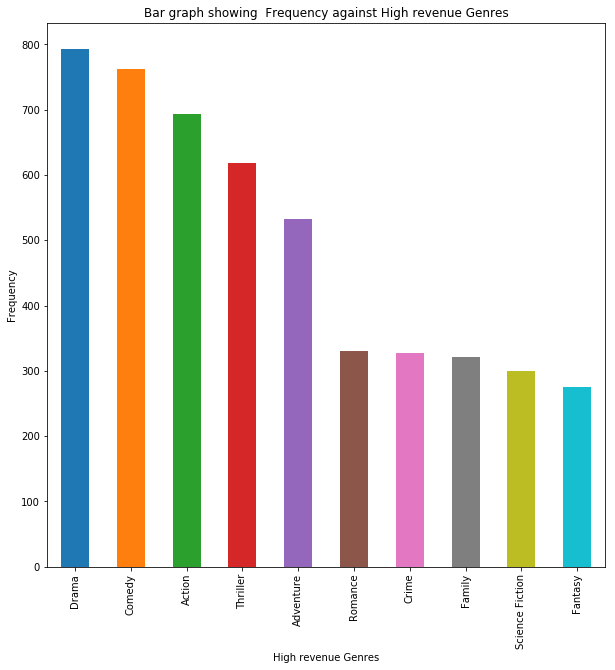

In [37]:
plotBar(top_ten_genre,"High revenue Genres","Frequency")

<a id='q2e'></a>
##### Q2e: In which month of the year was most of the high revenue movies released?

In [38]:
# Get the months from the release date
high_revenues['months'] = high_revenues.release_date.dt.month
high_revenues.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,months
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4


In [39]:
# Identify the month values by their names
import calendar as cal
high_revenues['month_name'] = high_revenues.months.apply(lambda x: cal.month_name[x])
high_revenues.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,months,month_name
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5,May
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3,March
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12,December
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4,April


In [40]:
# How many high revenue movies were released each month?
months_df=high_revenues.month_name.value_counts()
months_df

December     278
June         224
July         201
November     190
August       165
May          164
October      161
March        158
September    154
April        131
February     128
January       87
Name: month_name, dtype: int64

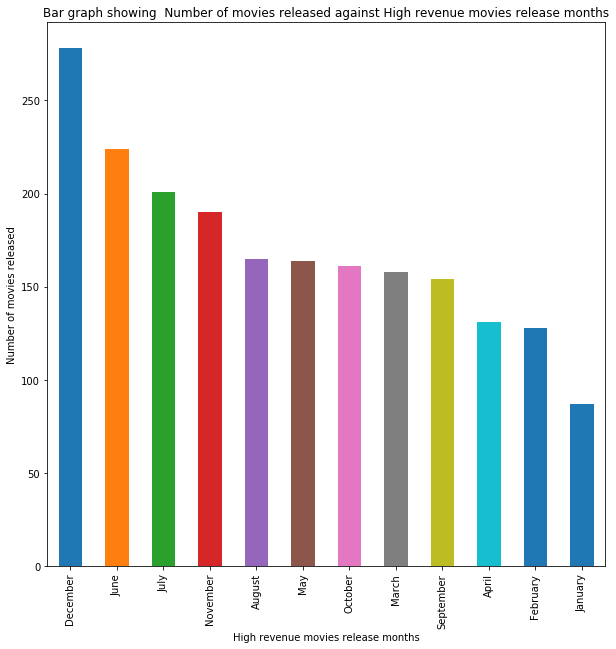

In [41]:
plotBar(months_df,"High revenue movies release months","Number of movies released")

> From the analysis above, most high revenue movies were released in December

<a id='q3'></a>
### Research Question 3: Does the popularity of a movie affect its revenue?

> To answer this question, we need to find the corelation between popularity and revenue

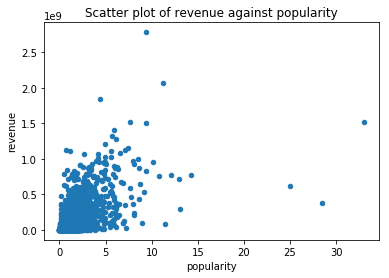

In [42]:
# Generate a scatter plot for popularity and revenue
df.plot.scatter(x='popularity',y='revenue', title='Scatter plot of revenue against popularity');

> From the plot above, we can see that there is a sort of positive correlation between popularity and revenue. However, there are outliers on the data. We need to remove these outliers. So, we will remove popularity values above 6

In [43]:
# Remove outliers
pop_df = df.query('popularity < 6')
pop_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
13,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,2015-07-16,1575,5.8,2015
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015
15,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2015-12-25,2389,7.4,2015
16,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,109,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,2015-01-01,1578,6.1,2015
17,5.573184,130000000,518602163,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,115,Science Fiction|Action|Adventure,Marvel Studios,2015-07-14,3779,7.0,2015


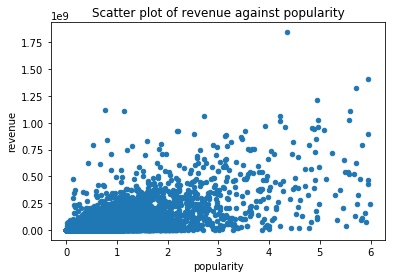

In [44]:
pop_df.plot.scatter(x='popularity',y='revenue',title='Scatter plot of revenue against popularity');

> Now, we can see that the revenue from a movie is directly proportional to its popularity. So, popular movies are most likely to earn higher revenues

<a id='q4'></a>
### Research Question 4: How does the budget affect the movie runtime?

> Here, we will try to find out if movies that are costlier to produce have higher runtime

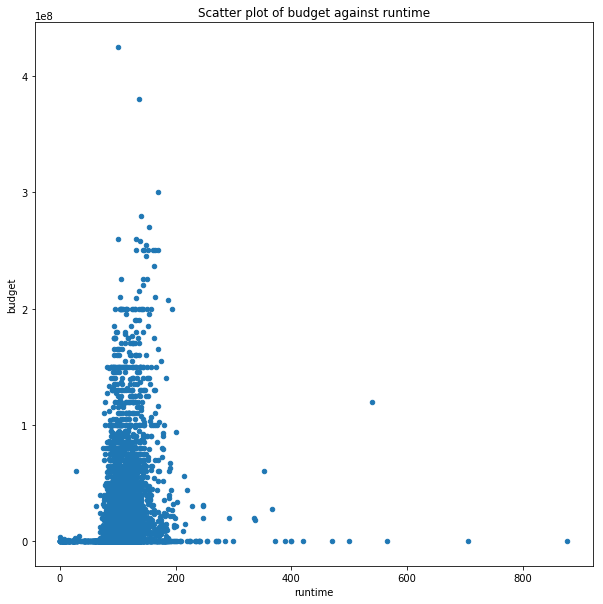

In [45]:
df.plot.scatter(x='runtime', y = 'budget',title='Scatter plot of budget against runtime',figsize=(10,10));

In [46]:
# What is the average runtime?
print ("Average movie rintime is ",df.runtime.mean(),"Minutes")

Average movie rintime is  102.934349115 Minutes


> Here, we can see that there is no correlation between budget and runtime. However the average runtime for the movies is about 102 minutes

<a id='q5'></a>
### Research Question 5: Which year had the highest movie releases?

> To answer this question, let us first plot a histogram of the release years.

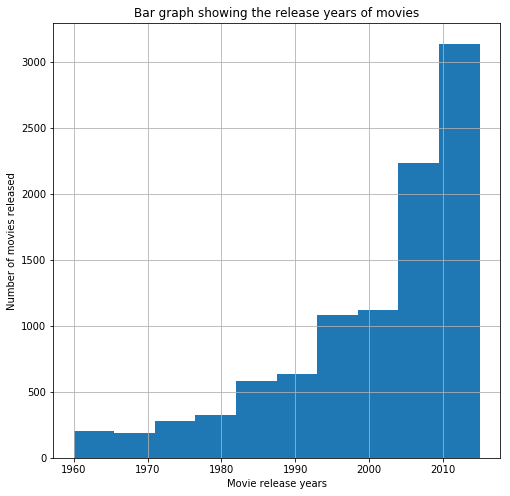

In [47]:
# Get a summary of the data
df['release_year'].hist(figsize=(8,8));
plt.xlabel("Movie release years");
plt.ylabel("Number of movies released");
plt.title("Bar graph showing the release years of movies");


> From the histogram, it seems that the years above 2010 had the highest number of movie releases. Let us explore more using value counts

In [48]:
# Release years
r_year= df.release_year.value_counts()
r_year.head(10)

2014    635
2013    568
2015    558
2012    500
2009    475
2011    456
2008    441
2010    420
2007    389
2006    350
Name: release_year, dtype: int64

> As we  can see from the value_count result, 2014 was the year with the highest number of movie releases. We can confirm this further using mode() and then drawing a bar chat to visualize it 

In [49]:
# Get the year with the highest number of movie releases using mode
mode_release_year = df.release_year.mode()
mode_release_year

0    2014
dtype: int64

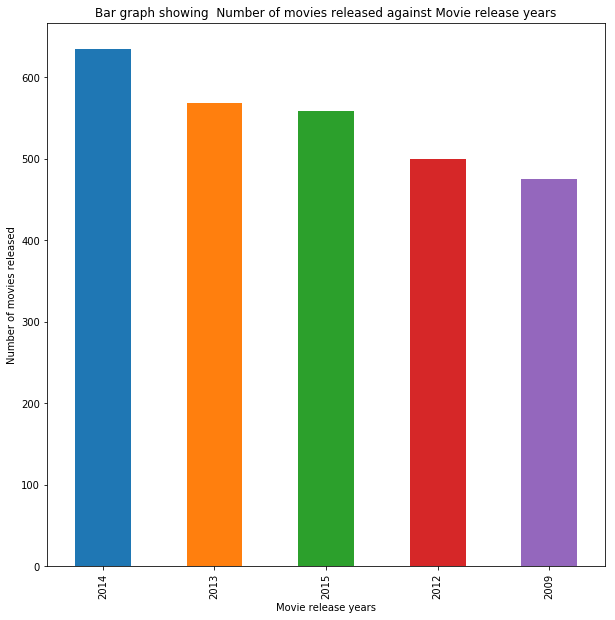

In [50]:
plotBar(r_year.head(),"Movie release years","Number of movies released")

> From the analyses above, it is now obvious that 2014 had the highest number of movie releases.

<a id='conclusions'></a>
## Conclusions

> From the analysis, we found out the following:

* Drama is the most popular genre from year to year. Does that mean that people like more drama movies? Or is it that Drama are the cheapest to produce? This is subject to further research.

* High revenue movies have high average votes. A movie which belong to the following genres: Drama, Comedy, Action, Thriller, and Adventure is likely to be a high revenue movie. Additionally, this movie needs to be released in December or June as it is more likely to succeed. Lastly, a movie directed by Steven Spielberg, Clint Eastwood, Ron Howard, or Ridley Scott and featuring Robert De Niro, Bruce Willis, Tom Cruise, Tom Hanks, Eddie Murphy, or Sylvester Stallone is likely to be a high revenue movie.

* The more popular a movie is, the more likely it is to be a high revenue movie. So, the higher the popularity of a movie, the higer its revenue.

* The cost of production of a movie does not determine its revenue. This means that the revenue gotten from a movie is not a function of how costly it was to produce. 

* Lastly, as time passes by, more and more movies are being produced. This is evident from the histogram of the release years. We can therefore conclude that more movies are likely to be released in the comming years.

###### Limitations of this analysis
> During the data cleaning process, some missing values were dropped while others were filled with the mode of the values in that column. Dropping some columns does not have huge impact on our analysis because the questions that we asked did not use those columns.

> However, filling the genre column with the mode of the genres may have an impact on our analysis as some of the filled values may not actiually be in the category of the mode value. This increases the value count of the mode value and does not fully represent the dataset. Similarly, some data were dropped (over 1000 data points; about 10%). Since only about 90% of the data were used in the analysis, the analysis is biased and does not represent the whole scenario.

## Submitting your Project 

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0